In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
#read the file and store in the form of dataframe
df = pd.read_csv("/content/Adidas US Sales Datasets.csv")

In [ ]:
#displaying first 5 observations
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store


In [ ]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [ ]:
#find the missing values
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
#Drop null/missing values
df.dropna(inplace=True)

In [ ]:
#changing datatypes of columns Price per Unit, Total Sales, Operating Profit, Operating Margin
characters_remove = [',','$','%']
columns = ['Price per Unit','Total Sales','Operating Profit','Operating Margin']
for ch in characters_remove:
    for cl in columns:
        df[cl] = df[cl].str.replace(ch,'')

for cl in columns:
    df[cl] = df[cl].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   object 
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 980.0+ KB


In [ ]:
#Descriptive statistics for Price per Unit
df["Price per Unit"].describe()

count    9648.000000
mean       45.216625
std        14.705397
min         7.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       110.000000
Name: Price per Unit, dtype: float64

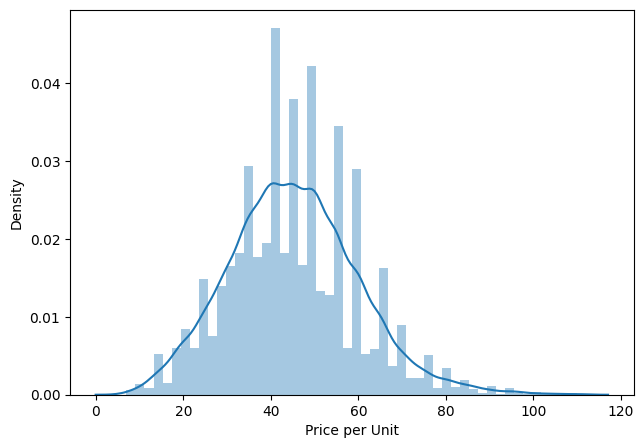

In [ ]:
#Distribution plot for Price per Unit
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Price per Unit'])
plt.show()

<Axes: >

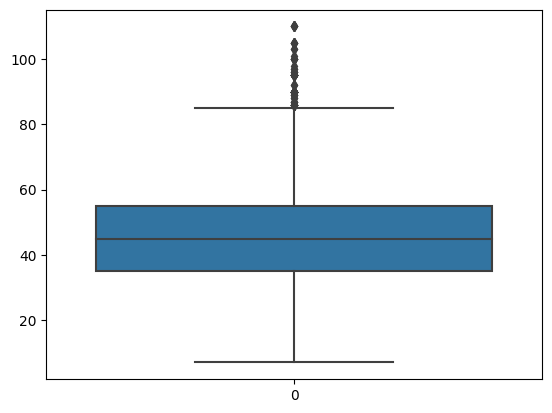

In [ ]:
#Box plot for Price per Unit to visualize the outlier
sns.boxplot(df['Price per Unit'])

In [ ]:
#Finding the first and third quartile for Price per Unit
ap_percentile25 = df['Price per Unit'].quantile(0.25)
ap_percentile75 = df['Price per Unit'].quantile(0.75)
print("percentile25: ",ap_percentile25)
print("percentile75: ",ap_percentile75)

percentile25:  35.0
percentile75:  55.0


In [ ]:
#Finding the IQR for Price per Unit
iqr_ap= ap_percentile75 - ap_percentile25
print("IQR:", iqr_ap)

IQR: 20.0


In [ ]:
#Finding upper and lower limits for Price per Unit
upper_limit_ap = ap_percentile75 + 1.5 * iqr_ap
lower_limit_ap = ap_percentile25 - 1.5 * iqr_ap
print("upper_limit:",upper_limit_ap)
print("lower_limit:",lower_limit_ap)

upper_limit: 85.0
lower_limit: 5.0


In [ ]:
#Finding Outliers
df[df['Price per Unit'] > upper_limit_ap]
df[df['Price per Unit'] < lower_limit_ap]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [ ]:
#Trimming Outliers
df1 = df[df['Price per Unit'] < upper_limit_ap]
df1.shape

(9532, 13)

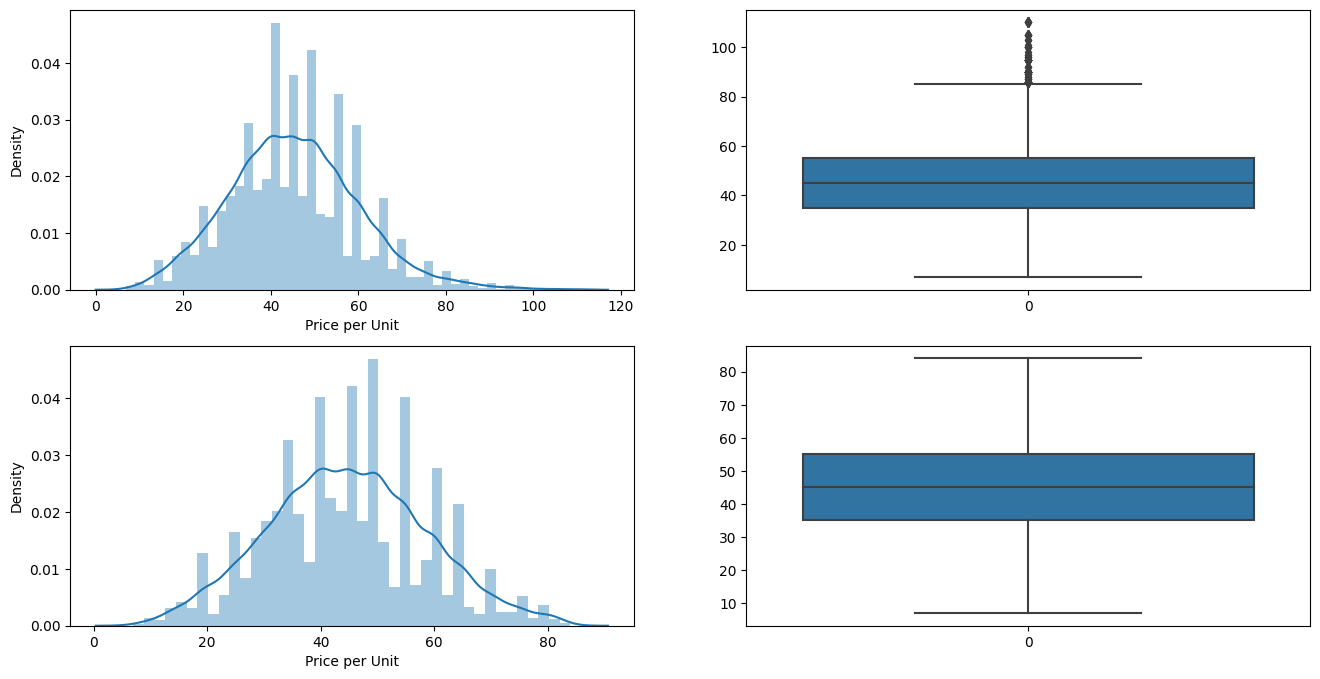

In [ ]:
#Compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Price per Unit'])
plt.subplot(2,2,2)
sns.boxplot(df['Price per Unit'])
plt.subplot(2,2,3)
sns.distplot(df1['Price per Unit'])
plt.subplot(2,2,4)
sns.boxplot(df1['Price per Unit'])
plt.show()

In [ ]:
#Descriptive statistics for Price per Unit after removing outliers
df1["Price per Unit"].describe()

count    9532.000000
mean       44.659463
std        13.875250
min         7.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        84.000000
Name: Price per Unit, dtype: float64

In [ ]:
#Descriptive statistics for Operating Margin
df["Operating Margin"].describe()

count    9648.000000
mean       42.299129
std         9.719742
min        10.000000
25%        35.000000
50%        41.000000
75%        49.000000
max        80.000000
Name: Operating Margin, dtype: float64

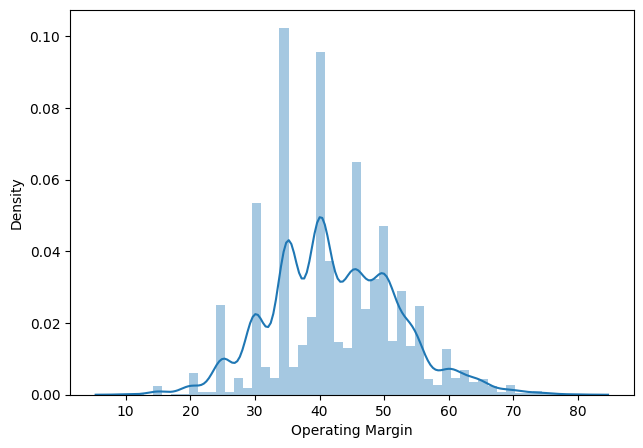

In [ ]:
#Distribution plot for Operating Margin
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Operating Margin'])
plt.show()

<Axes: >

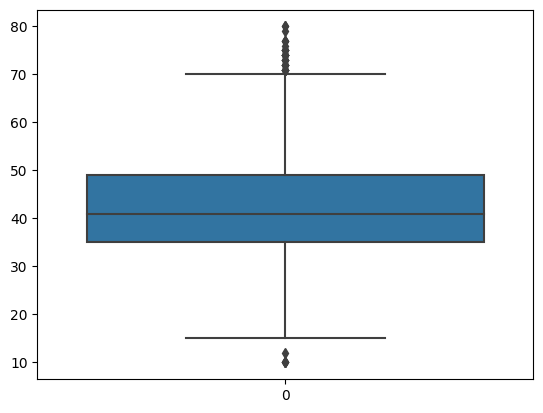

In [ ]:
#Box plot for Operating Margin to visualize the outlier
sns.boxplot(df['Operating Margin'])

In [ ]:
#Finding the first and third quartile for Operating Margin
dp_percentile25 = df['Operating Margin'].quantile(0.25)
dp_percentile75 = df['Operating Margin'].quantile(0.75)
print("percentile25: ",dp_percentile25)
print("percentile75: ",dp_percentile75)

percentile25:  35.0
percentile75:  49.0


In [ ]:
#Finding the IQR for Operating Margin
iqr_dp= dp_percentile75 - dp_percentile25
print("IQR:", iqr_dp)

IQR: 14.0


In [ ]:
#Finding upper and lower limits for Operating Margin
upper_limit_dp = dp_percentile75 + 1.5 * iqr_dp
lower_limit_dp = dp_percentile25 - 1.5 * iqr_dp
print("upper_limit:",upper_limit_dp)
print("lower_limit:",lower_limit_dp)

upper_limit: 70.0
lower_limit: 14.0


In [ ]:
#Finding Outliers
df[df['Operating Margin'] > upper_limit_dp]
df[df['Operating Margin'] < lower_limit_dp]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
193,West Gear,1128299,29-01-2021,West,California,San Francisco,Women's Apparel,70.0,775,542500.0,54250.0,10.0,Outlet
199,West Gear,1128299,04-02-2021,West,California,San Francisco,Women's Apparel,70.0,700,490000.0,49000.0,10.0,Outlet
205,West Gear,1128299,10-02-2021,West,California,San Francisco,Women's Apparel,70.0,775,542500.0,54250.0,10.0,Outlet
211,West Gear,1128299,16-02-2021,West,California,San Francisco,Women's Apparel,70.0,800,560000.0,56000.0,10.0,Outlet
7975,West Gear,1128299,04-02-2021,West,California,San Francisco,Women's Apparel,46.0,224,10304.0,1236.0,12.0,Outlet


In [ ]:
#Trimming Outliers
df2 = df[df['Operating Margin'] < upper_limit_dp]
df2.shape

(9590, 13)

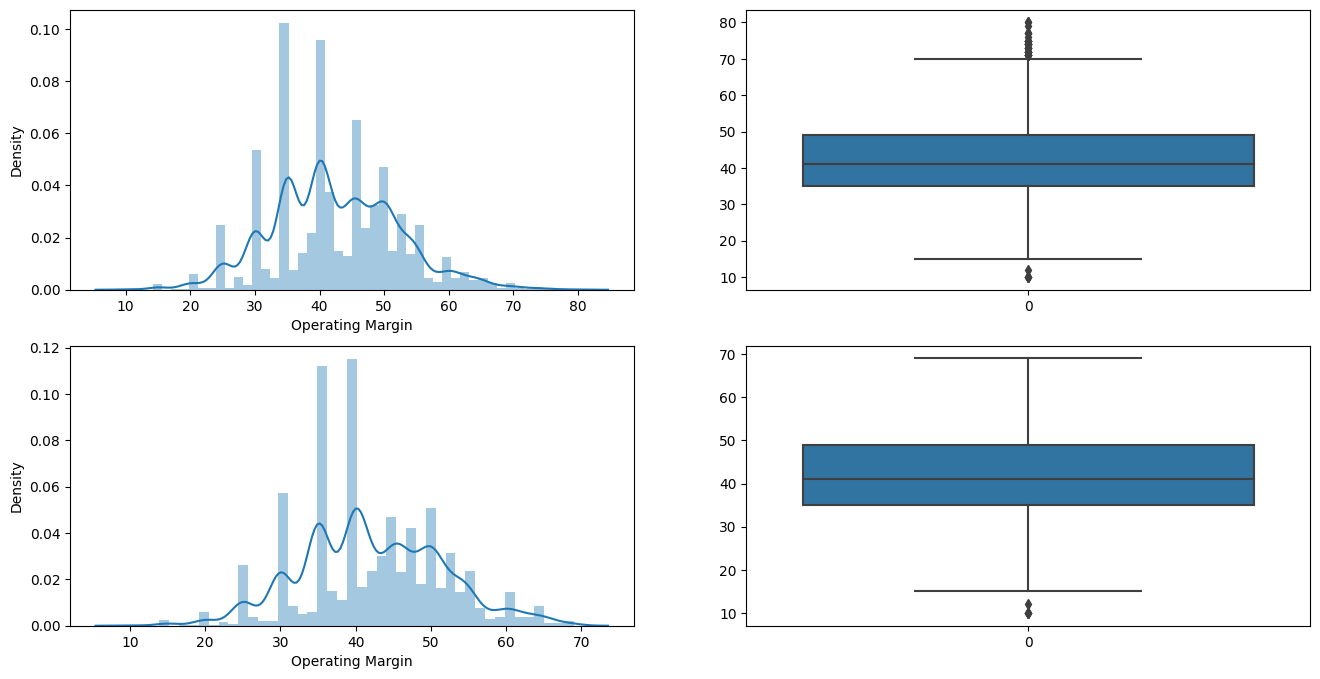

In [ ]:
#Compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Operating Margin'])
plt.subplot(2,2,2)
sns.boxplot(df['Operating Margin'])
plt.subplot(2,2,3)
sns.distplot(df2['Operating Margin'])
plt.subplot(2,2,4)
sns.boxplot(df2['Operating Margin'])
plt.show()

In [ ]:
#Descriptive statistics for Operating Margin after removing outliers
df2["Operating Margin"].describe()

count    9590.000000
mean       42.115746
std         9.455493
min        10.000000
25%        35.000000
50%        41.000000
75%        49.000000
max        69.000000
Name: Operating Margin, dtype: float64